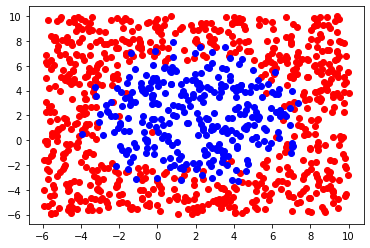

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize 
import numpy as np
import pandas as pd
import math
df=pd.read_csv("cdataset.csv")
x = df['x'].values
xSqr = x*x
y = df['y'].values
ySqr = y*y
m = df['label'].values
plt.scatter(x[m==0],y[m==0], color='red')
plt.scatter(x[m==1],y[m==1], color='blue')
plt.show()


 1. Can a standard linear boundary of the form z = β0 + β1x + β2y successfully separate
these classes? Justify your answer. 
2. [No because clearly the one set of points is completely enclosed by the other therefore a line can't separate them. We will use a circle to create a separating boundary.]

In [21]:
def binary_cross_loss(params, x,y,m): 
    delta = 10**(-5)
    a,b,c,d,e = params 
    z=a*x**2+b*y**2+c*x+d*y+e
    m_hat=1/(1+np.exp(-z))
    mse=-(m*np.log10(m_hat + delta)+(1-m)*np.log10(1-m_hat+delta))
    return np.mean(mse)


In [22]:
initial_guess = [0,0,0,0,0] 
result_mse = minimize(binary_cross_loss, initial_guess, args=(x, y,m)) 
a,b,c ,d,e= result_mse.x 

C:\Users\PRINCE\AppData\Local\Temp\ipykernel_2152\295138467.py:24: UserWarning: The following kwargs were not used by contour: 'size'
  plt.contour(X, Y, F, levels=[0], colors='black',size=5, linewidths=2)


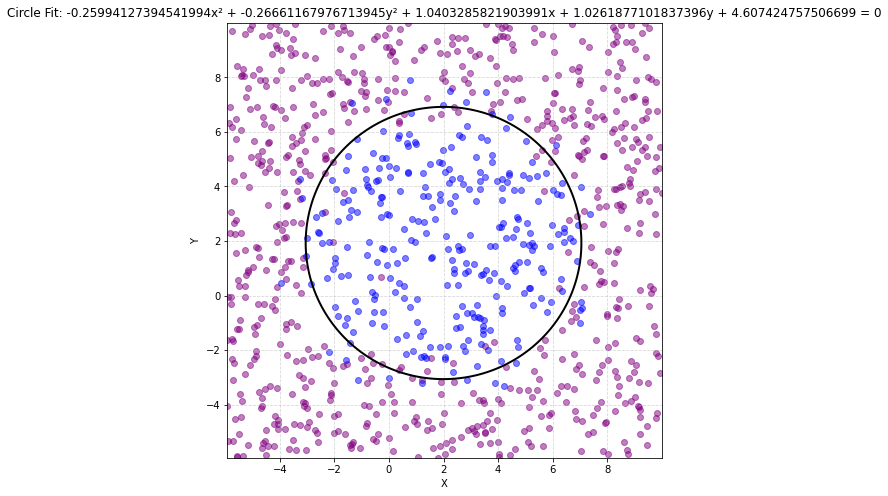

In [23]:
import matplotlib.pyplot as plt
import numpy as np
  # Example values

# 2. Create a grid of points covering the plot area
# Adjust ranges based on your scatter plot limits (e.g., -6 to 10)
x_range = np.linspace(min(x),max(x), 500)
y_range = np.linspace(min(y),max(y), 500)

X, Y = np.meshgrid(x_range, y_range)

# 3. Define the circle equation
F = a*X**2 + b*Y**2 + c*X + d*Y + e

# 4. Create the plot
plt.figure(figsize=(8, 8))
plt.scatter(x[m==0],y[m==0], color='purple', alpha=0.5)
plt.scatter(x[m==1],y[m==1], color='blue',alpha=0.5)
# --- Plot your original scatter data here ---
# plt.scatter(df['x'], df['y'], c=y_label, cmap='bwr', s=10)

# 5. Overlay the circle boundary
# levels=[0] ensures we only draw the line where the equation equals 0
plt.contour(X, Y, F, levels=[0], colors='black',size=5, linewidths=2)

# Formatting
plt.title(f'Circle Fit: {a}x² + {b}y² + {c}x + {d}y + {e} = 0')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal') # Vital for a circle to look round
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [24]:
print("a",a,"...b=",b,"...c=",c,"...d=",d,"...e=",e)

a -0.25994127394541994 ...b= -0.26661167976713945 ...c= 1.0403285821903991 ...d= 1.0261877101837396 ...e= 4.607424757506699


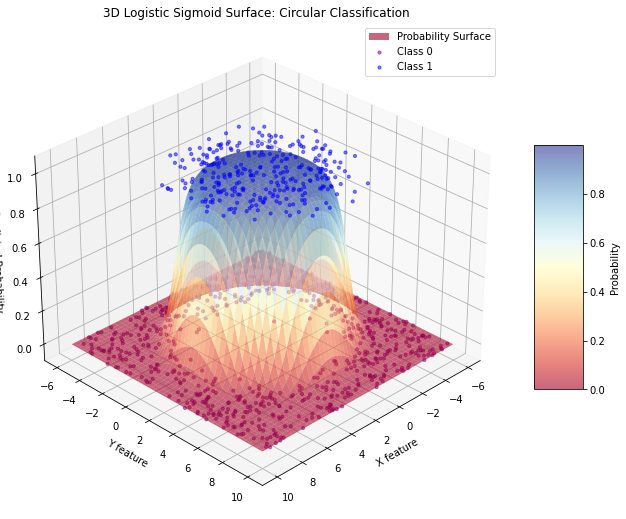

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# 1. SETUP DATA AND GRID
# Assuming a, b, c, d, e and x, y, m are already defined
x_range = np.linspace(x.min(), x.max(), 100)
y_range = np.linspace(y.min(), y.max(), 100)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)

# 2. CALCULATE SIGMOID SURFACE
# The decision function value
F_mesh = a*X_mesh**2 + b*Y_mesh**2 + c*X_mesh + d*Y_mesh + e

# Logistic Sigmoid: 1 / (1 + exp(-F))
# Note: You may need to multiply F_mesh by a scaling factor to adjust the 'steepness'
Z_prob = 1 / (1 + np.exp(-F_mesh))

# 3. CREATE 3D PLOT
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the Sigmoid Surface
surf = ax.plot_surface(X_mesh, Y_mesh, Z_prob, cmap=cm.RdYlBu, 
                       alpha=0.6, antialiased=True, label='Probability Surface')

# 4. PLOT SCATTER POINTS AT THEIR PROBABILITY LEVELS
# Label 0: Purple points plotted at Z=0 (Actual Label)
ax.scatter(x[m==0], y[m==0], np.zeros_like(x[m==0]), 
           color='purple', marker='o', s=10, alpha=0.5, label='Class 0')

# Label 1: Blue points plotted at Z=1 (Actual Label)
ax.scatter(x[m==1], y[m==1], np.ones_like(x[m==1]), 
           color='blue', marker='o', s=10, alpha=0.5, label='Class 1')

# 5. FORMATTING
ax.set_xlabel('X feature')
ax.set_ylabel('Y feature')
ax.set_zlabel('Predicted Probability')
ax.set_title('3D Logistic Sigmoid Surface: Circular Classification')
ax.set_zlim(-0.1, 1.1)

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5, label='Probability')

# Initial view angle for better perspective
ax.view_init(elev=30, azim=45)

plt.legend()
plt.show()

In [29]:
import plotly.graph_objects as go
import numpy as np

# 1. SETUP GRID
# Assuming a, b, c, d, e and x, y, m are already defined in your environment
x_range = np.linspace(x.min(), x.max(), 100)
y_range = np.linspace(y.min(), y.max(), 100)
X_mesh, Y_mesh = np.meshgrid(x_range, y_range)

# 2. CALCULATE SIGMOID SURFACE
# Decision function based on your circle coefficients
F_mesh = a*X_mesh**2 + b*Y_mesh**2 + c*X_mesh + d*Y_mesh + e
# Logistic Sigmoid conversion
Z_prob = 1 / (1 + np.exp(-F_mesh))

# 3. CREATE THE FIGURE
fig = go.Figure()

# Add the Sigmoid Surface
fig.add_trace(go.Surface(
    x=X_mesh, y=Y_mesh, z=Z_prob,
    colorscale='RdYlBu',
    opacity=0.6,
    colorbar_title='Probability',
    showscale=True,
    name='Probability Surface'
))

# Add Class 0 Points (Purple, plotted at Z=0)
fig.add_trace(go.Scatter3d(
    x=x[m==0], y=y[m==0], z=np.zeros_like(x[m==0]),
    mode='markers',
    marker=dict(size=3, color='purple', opacity=0.5),
    name='Class 0 (y=0)'
))

# Add Class 1 Points (Blue, plotted at Z=1)
fig.add_trace(go.Scatter3d(
    x=x[m==1], y=y[m==1], z=np.ones_like(x[m==1]),
    mode='markers',
    marker=dict(size=3, color='blue', opacity=0.5),
    name='Class 1 (y=1)'
))

# 4. UPDATE LAYOUT
fig.update_layout(
    title='3D Interactive Circular Logistic Regression',
    scene=dict(
        xaxis_title='X Feature',
        yaxis_title='Y Feature',
        zaxis_title='Predicted Probability',
        zaxis=dict(range=[-0.1, 1.1])
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show(renderer="browser")